# AWS Comprehend

## Install dependencies

In [ ]:
pip install boto3

## Set AWS Creds AccessKey/SecretKey

In [3]:
import os

# Set environment variable
os.environ['AWS_ACCESS_KEY_ID'] = ''
os.environ['AWS_SECRET_ACCESS_KEY'] = ''
os.environ['AWS_SESSION_TOKEN'] = ''

In [4]:
# using boto3 comprehend detect PII in text
import boto3
import json

comprehend = boto3.client(service_name='comprehend', region_name='us-east-1')

In [5]:
text = "My name is John and I am 25 years old. My phone number is 000000000000 and my email is XXXXXXXXXXXXXXXX@gmail.com my card is 1111-1111-1111-1111 and pin was 1234"
print('Calling DetectPiiEntities')
json_data = comprehend.detect_pii_entities(Text=text, LanguageCode='en')
print(json.dumps(json_data, sort_keys=True, indent=4))
print("End of DetectPiiEntities\n")    

Calling DetectPiiEntities
{
    "Entities": [
        {
            "BeginOffset": 11,
            "EndOffset": 15,
            "Score": 0.9998698234558105,
            "Type": "NAME"
        },
        {
            "BeginOffset": 25,
            "EndOffset": 33,
            "Score": 0.9999417662620544,
            "Type": "AGE"
        },
        {
            "BeginOffset": 58,
            "EndOffset": 70,
            "Score": 0.9999783039093018,
            "Type": "PHONE"
        },
        {
            "BeginOffset": 87,
            "EndOffset": 113,
            "Score": 0.9991216063499451,
            "Type": "EMAIL"
        },
        {
            "BeginOffset": 125,
            "EndOffset": 144,
            "Score": 0.9999704360961914,
            "Type": "CREDIT_DEBIT_NUMBER"
        },
        {
            "BeginOffset": 157,
            "EndOffset": 161,
            "Score": 0.9999898672103882,
            "Type": "PIN"
        }
    ],
    "ResponseMetadata": {
        

## Analysis

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from IPython.display import display

# Create a DataFrame from the JSON data
df = pd.DataFrame(json_data["Entities"])

# Display the table
display(df)

,Score,Type,BeginOffset,EndOffset
0,0.999870,NAME,11,15
1,0.999942,AGE,25,33
2,0.999978,PHONE,58,70
3,0.999122,EMAIL,87,113
4,0.999970,CREDIT_DEBIT_NUMBER,125,144
5,0.999990,PIN,157,161


In [8]:
df["ExtractedText"] = [text[entry["BeginOffset"]:entry["EndOffset"]] for _, entry in df.iterrows()]

# Display the updated table
display(df)

,Score,Type,BeginOffset,EndOffset,ExtractedText
0,0.999870,NAME,11,15,John
1,0.999942,AGE,25,33,25 years
2,0.999978,PHONE,58,70,000000000000
3,0.999122,EMAIL,87,113,XXXXXXXXXXXXXXXX@gmail.com
4,0.999970,CREDIT_DEBIT_NUMBER,125,144,1111-1111-1111-1111
5,0.999990,PIN,157,161,1234


## Sentiment Analysis Martin Luter King "I believe..." talk

![king.webp](king.webp)

In [9]:
martin_luter_talk = """
    I say to you today, my friends, so even though we face the difficulties of today and tomorrow,
    I still have a dream. It is a dream deeply rooted in the American dream.
    I have a dream that one day this nation will rise up and live out the true meaning of its creed:
    'We hold these truths to be self-evident, that all men are created equal.
    """

print('Calling DetectSentiment')
sentiment_output = comprehend.detect_sentiment(Text=martin_luter_talk, LanguageCode='en')
print(json.dumps(sentiment_output, sort_keys=True, indent=4))
print("End of DetectSentiment\n")

Calling DetectSentiment
{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "164",
            "content-type": "application/x-amz-json-1.1",
            "date": "Sun, 12 Nov 2023 10:28:18 GMT",
            "x-amzn-requestid": "343f5d13-41b8-41a9-b2d3-74b7bc5542c7"
        },
        "HTTPStatusCode": 200,
        "RequestId": "343f5d13-41b8-41a9-b2d3-74b7bc5542c7",
        "RetryAttempts": 0
    },
    "Sentiment": "POSITIVE",
    "SentimentScore": {
        "Mixed": 0.0012894617393612862,
        "Negative": 0.0006538676097989082,
        "Neutral": 0.1380418837070465,
        "Positive": 0.8600147366523743
    }
}
End of DetectSentiment



In [10]:
sentiment_output['SentimentScore']

{'Positive': 0.8600147366523743,
 'Negative': 0.0006538676097989082,
 'Neutral': 0.1380418837070465,
 'Mixed': 0.0012894617393612862}

In [11]:
sentiment_output['Sentiment']

'POSITIVE'

## Show graph

In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


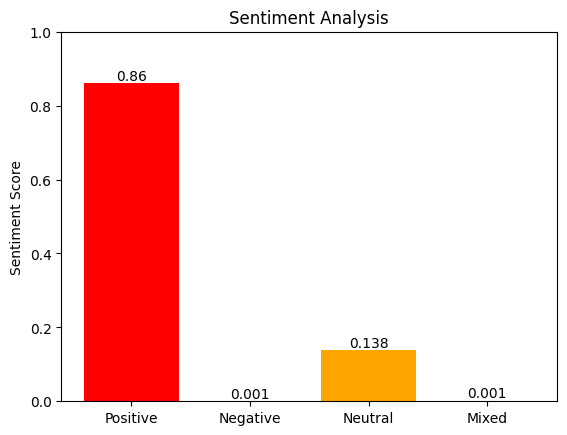

In [13]:
import matplotlib.pyplot as plt

# SentimentScore data
sentiment_scores = sentiment_output['SentimentScore']

# Plotting
fig, ax = plt.subplots()
colors = ['red', 'blue', 'orange', 'green']  # Define colors for each sentiment
bars = ax.bar(sentiment_scores.keys(), sentiment_scores.values(), color=colors)

# Add labels and title
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis')
ax.set_ylim(0, 1)  # Set the y-axis limit to 0-1

# Display the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Show the plot
plt.show()

## Detect Toxic in Speech

### Terminator

"I Need Your Clothes, Your Boots and Your Motorcycle."

![term.jpeg](term.jpeg)

In [14]:
response = comprehend.detect_toxic_content(
        TextSegments=[
            {
                'Text': 'I Need Your Clothes, Your Boots and Your Motorcycle.'
            },
        ],
        LanguageCode='en'
    )
print(json.dumps(response, sort_keys=True, indent=4))

{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "416",
            "content-type": "application/x-amz-json-1.1",
            "date": "Sun, 12 Nov 2023 10:28:49 GMT",
            "x-amzn-requestid": "83168a53-4241-4f9a-b186-e9d9f6499335"
        },
        "HTTPStatusCode": 200,
        "RequestId": "83168a53-4241-4f9a-b186-e9d9f6499335",
        "RetryAttempts": 0
    },
    "ResultList": [
        {
            "Labels": [
                {
                    "Name": "PROFANITY",
                    "Score": 0.07029999792575836
                },
                {
                    "Name": "HATE_SPEECH",
                    "Score": 0.07109999656677246
                },
                {
                    "Name": "INSULT",
                    "Score": 0.20020000636577606
                },
                {
                    "Name": "GRAPHIC",
                    "Score": 0.01860000006854534
                },
                {
              

### God Father

'Bonasera, Bonasera, what have I ever done to make you treat me so disrespectfully? If you’d come to me in friendship, this scum who ruined your daughter would be suffering this very day. And if by some chance an honest man like yourself made enemies, they would become my enemies. And then, they would fear you.'

![Godfather.jpeg](god_father.jpeg)

In [15]:
response = comprehend.detect_toxic_content(
        TextSegments=[
            {
                'Text': 'Bonasera, Bonasera, what have I ever done to make you treat me so disrespectfully? If you’d come to me in friendship, this scum who ruined your daughter would be suffering this very day. And if by some chance an honest man like yourself made enemies, they would become my enemies. And then, they would fear you.'
            },
        ],
        LanguageCode='en'
    )
print(json.dumps(response, sort_keys=True, indent=4))

{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "413",
            "content-type": "application/x-amz-json-1.1",
            "date": "Sun, 12 Nov 2023 10:28:52 GMT",
            "x-amzn-requestid": "96f03880-aba3-4748-8330-7d2555d42c72"
        },
        "HTTPStatusCode": 200,
        "RequestId": "96f03880-aba3-4748-8330-7d2555d42c72",
        "RetryAttempts": 0
    },
    "ResultList": [
        {
            "Labels": [
                {
                    "Name": "PROFANITY",
                    "Score": 0.14669999480247498
                },
                {
                    "Name": "HATE_SPEECH",
                    "Score": 0.1316000074148178
                },
                {
                    "Name": "INSULT",
                    "Score": 0.8208000063896179
                },
                {
                    "Name": "GRAPHIC",
                    "Score": 0.05389999970793724
                },
                {
                

In [16]:
response['ResultList'][0]['Toxicity']

0.6919000148773193

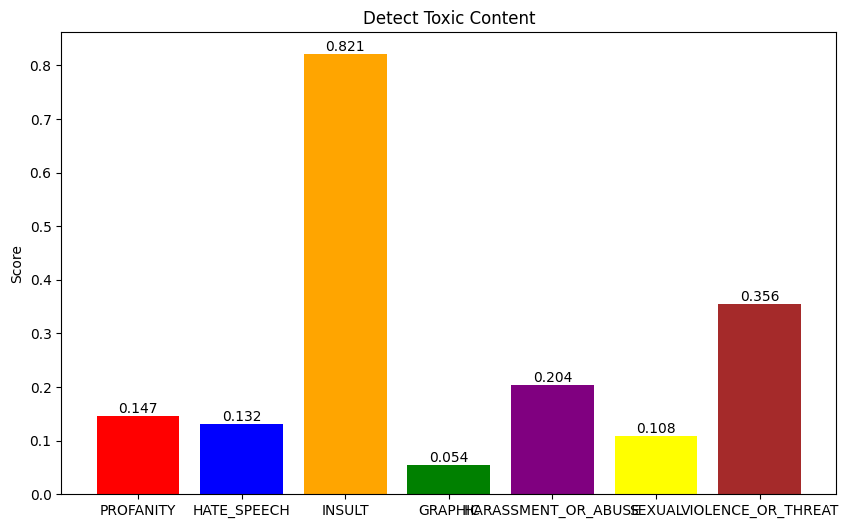

In [19]:
import matplotlib.pyplot as plt

# Data
labels_data = response['ResultList'][0]['Labels']

# Extracting labels and scores
labels = [entry["Name"] for entry in labels_data]
scores = [entry["Score"] for entry in labels_data]

# Plotting

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width as needed
colors = ['red', 'blue', 'orange', 'green', 'purple', 'yellow', 'brown']  # Define colors for each sentiment
bars = ax.bar(labels, scores, color=colors)  # You can change the color as needed

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Detect Toxic Content')

# Display the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Show the plot
plt.show()